In [ ]:
# 이동편균선
# 볼린저밴드
# RSI
# MACD
# (stochastic)

In [1]:
# 이동 평균선

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [6]:
df = fdr.DataReader('005930', '2020', '2022')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [9]:
df['Close'] / df['Close'].shift(1) -1

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [8]:
df['Close'].pct_change(1)

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [11]:
# 누적 수익율

df['return'].cumprod()

KeyError: 'return'

In [12]:
# 이동편균선

In [14]:
df.Close

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-24    80500
2021-12-27    80200
2021-12-28    80300
2021-12-29    78800
2021-12-30    78300
Name: Close, Length: 496, dtype: int64

In [18]:
df['5ma'] = df['Close'].rolling(5).mean()
df['20ma'] = df['Close'].rolling(20).mean()

<AxesSubplot:xlabel='Date'>

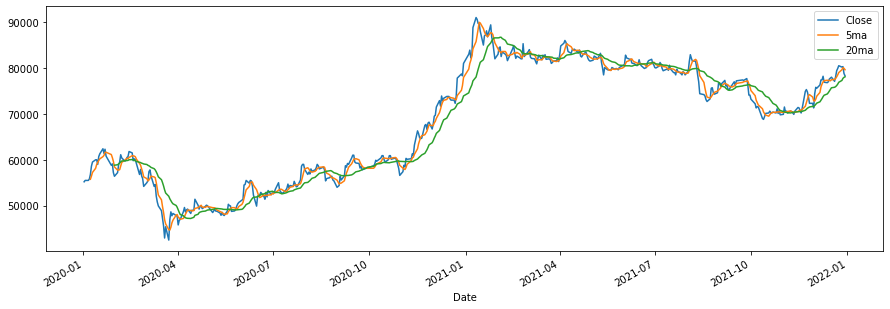

In [21]:
df[['Close', '5ma', '20ma']].plot(figsize=(15, 5))

In [28]:
# 지수 이동평균선 : 현재와 가까운 값에 더 큰 가중치를 주어서 계산한 평균값

In [24]:
df['20ewma'] = df['Close'].ewm(span=20).mean()
df['60ewma'] = df['Close'].ewm(span=60).mean()

<AxesSubplot:xlabel='Date'>

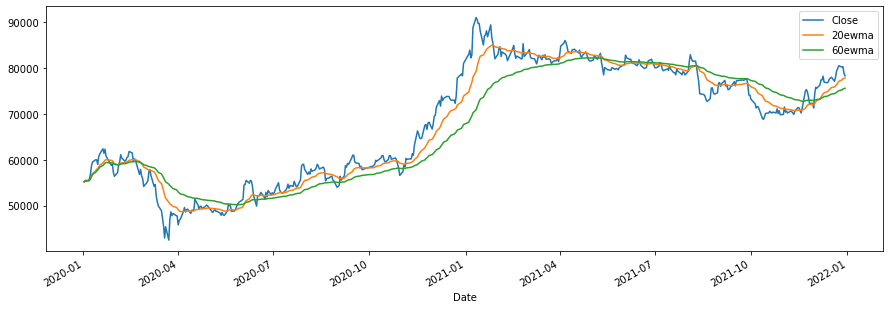

In [26]:
df[['Close', '20ewma', '60ewma']].plot(figsize=(15,5))

In [31]:
df['Close'].asfreq('3D')

Date
2020-01-02    55200.0
2020-01-05        NaN
2020-01-08    56800.0
2020-01-11        NaN
2020-01-14    60000.0
               ...   
2021-12-16    77800.0
2021-12-19        NaN
2021-12-22    79400.0
2021-12-25        NaN
2021-12-28    80300.0
Freq: 3D, Name: Close, Length: 243, dtype: float64

In [33]:
df['Close'].resample('M').mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76305.263158
2021-10-31    70563.157895
2021-11-30    71536.363636
2021-12-31    77809.090909
Freq: M, Name: Close, dtype: float64

In [34]:
df['Close'].resample('Q').mean()

Date
2020-03-31    55833.870968
2020-06-30    50483.606557
2020-09-30    56562.500000
2020-12-31    65783.606557
2021-03-31    83886.666667
2021-06-30    81795.238095
2021-09-30    77709.677419
2021-12-31    73433.333333
Freq: Q-DEC, Name: Close, dtype: float64

In [35]:
df['Close'].resample('W').mean()

Date
2020-01-05    55350.0
2020-01-12    57240.0
2020-01-19    60200.0
2020-01-26    61725.0
2020-02-02    57875.0
               ...   
2021-12-05    73880.0
2021-12-12    77240.0
2021-12-19    77440.0
2021-12-26    79000.0
2022-01-02    79400.0
Freq: W-SUN, Name: Close, Length: 105, dtype: float64

In [36]:
# bollinger band

In [40]:
df = fdr.DataReader('005930', '2020', '2023')

In [41]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-04-21,67600,68300,67500,67700,12847448,0.004451
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448
2022-04-26,66400,66700,66100,66100,12946923,-0.003017
2022-04-27,65400,65500,64900,65100,10800158,-0.015129


In [42]:
df['ma20'] = df['Close'].rolling(20).mean()

In [43]:
df.head()

,Open,High,Low,Close,Volume,Change,ma20
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN


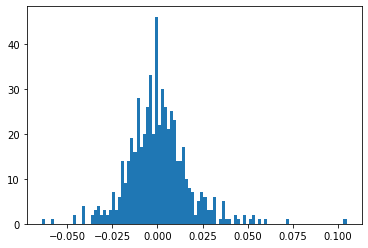

In [46]:
plt.hist(df.Change, bins=100)
plt.show()

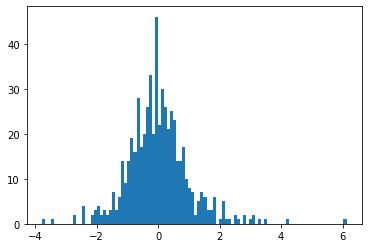

In [47]:
plt.hist((df.Change - df.Change.mean())/ df.Change.std(), bins=100)
plt.show()

In [48]:
# 표준정규분포 : 평균이 0이고.. 표준편차가 1인 좌우 대칭인 정규분포
# 표준편차 : 데이터들의 평균과의 차이(편차)의 평균, 데이터가 평균에서 얼마나 떨어져 있는가..
# 정규분포의 성질
# 1. +- 1표준편차의 범위에 68.2%의 데이터가 존재
# 2. +- 2표준편차의 범위에 95% 의 데이터가 존재
# 3. +- 3표준편차의 범위에 99.7의 데이터가 존재

In [49]:
df['stddev'] = df['Close'].rolling(20).std()

In [50]:
df

,Open,High,Low,Close,Volume,Change,ma20,stddev
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68395.0,1146.837758
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68255.0,1137.159434
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68085.0,1163.603749


In [51]:
df['upper_b'] = df['ma20'] + (df['stddev'] * 2)
df['lower_b'] = df['ma20'] - (df['stddev'] * 2)

In [52]:
df

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper_b,lower_b
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68395.0,1146.837758,70688.675515,66101.324485
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68255.0,1137.159434,70529.318869,65980.681131
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68085.0,1163.603749,70412.207498,65757.792502


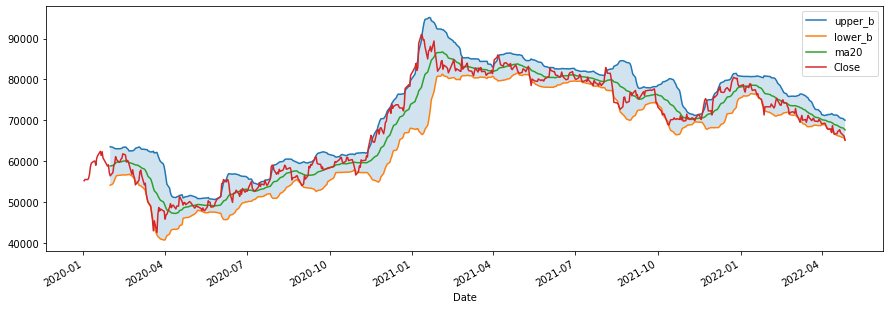

In [55]:
df[['upper_b', 'lower_b', 'ma20', 'Close']].plot(figsize=(15, 5))
plt.fill_between(df.index, df.lower_b, df.upper_b, alpha=0.2)

In [56]:
df.head()

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper_b,lower_b
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN


In [ ]:
# 매수 : lower_b 아래에 있는경우

In [67]:
df['pos1'] = df['Close'] <= df['lower_b']

In [68]:
df['pos1'] = df.pos1.apply(int)

In [61]:
df['20ma_upper'] = df['Close'] >= df['ma20']

In [62]:
df

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper_b,lower_b,pos,20ma_upper
Date,,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN,0,False
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN,0,False
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN,0,False
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN,0,False
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68395.0,1146.837758,70688.675515,66101.324485,0,False
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68255.0,1137.159434,70529.318869,65980.681131,0,False
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68085.0,1163.603749,70412.207498,65757.792502,0,False


In [ ]:
# 매도 : 주가가 20ma를 dead cross

In [64]:
df.head(3)

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper_b,lower_b,pos,20ma_upper
Date,,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN,0,False
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN,0,False
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN,0,False


In [65]:
df['sell_sig'] = (df['20ma_upper'].shift(1) == 1) & (df['Close'] < df['ma20'])
df['sell_sig'] = df['sell_sig'].apply(int)

In [69]:
buy_df = df[df['pos1'] == 1]

In [70]:
sell_df = df[df['sell_sig'] == 1]

In [74]:
concat_df = pd.concat([buy_df, sell_df]).sort_index()
concat_df

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper_b,lower_b,pos,20ma_upper,sell_sig,pos1
Date,,,,,,,,,,,,,,
2020-02-10,59200,59800,59100,59700,13107121,-0.011589,59785.0,1621.654451,63028.308902,56541.691098,0,False,1,0
2020-02-18,60800,60900,59700,59800,16674266,-0.027642,59970.0,1681.509347,63333.018694,56606.981306,0,False,1,0
2020-02-21,58800,59800,58500,59200,13777393,-0.013333,59635.0,1428.018502,62491.037004,56778.962996,0,False,1,0
2020-02-28,55000,55500,54200,54200,30054227,-0.030411,59085.0,2030.368128,63145.736257,55024.263743,1,False,0,1
2020-03-12,51000,51900,49300,50800,48149999,-0.024952,56880.0,2980.038855,62840.077711,50919.922289,1,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,68500,68500,68000,68000,20683327,-0.007299,69790.0,740.483484,71270.966967,68309.033033,1,False,0,1
2022-04-08,68100,68300,67700,67800,15453191,-0.002941,69680.0,861.210898,71402.421796,67957.578204,1,False,0,1
2022-04-12,67600,67700,67000,67000,13924389,-0.013255,69440.0,1099.952152,71639.904304,67240.095696,1,False,0,1


In [72]:
buy_df.index

DatetimeIndex(['2020-02-28', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-08-31',
               '2020-10-30', '2021-05-12', '2021-05-13', '2021-08-13',
               '2021-08-17', '2021-09-29', '2021-09-30', '2021-10-01',
               '2021-10-05', '2021-10-06', '2021-10-12', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-02-24', '2022-03-07',
               '2022-03-08', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-12', '2022-04-15', '2022-04-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [73]:
sell_df.index

DatetimeIndex(['2020-02-10', '2020-02-18', '2020-02-21', '2020-05-04',
               '2020-05-22', '2020-06-15', '2020-06-22', '2020-06-25',
               '2020-06-29', '2020-08-20', '2020-09-24', '2020-09-29',
               '2020-10-28', '2021-01-27', '2021-02-17', '2021-02-26',
               '2021-03-04', '2021-03-15', '2021-03-17', '2021-03-19',
               '2021-03-31', '2021-04-19', '2021-04-21', '2021-05-11',
               '2021-06-14', '2021-06-18', '2021-06-29', '2021-07-08',
               '2021-07-16', '2021-08-11', '2021-09-02', '2021-09-28',
               '2021-11-05', '2021-11-10', '2021-11-18', '2021-11-30',
               '2022-01-05', '2022-01-13', '2022-02-11', '2022-02-22'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [75]:
concat_df['st_pos'] = concat_df['pos1'] - concat_df['sell_sig']
concat_df

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper_b,lower_b,pos,20ma_upper,sell_sig,pos1,st_pos
Date,,,,,,,,,,,,,,,
2020-02-10,59200,59800,59100,59700,13107121,-0.011589,59785.0,1621.654451,63028.308902,56541.691098,0,False,1,0,-1
2020-02-18,60800,60900,59700,59800,16674266,-0.027642,59970.0,1681.509347,63333.018694,56606.981306,0,False,1,0,-1
2020-02-21,58800,59800,58500,59200,13777393,-0.013333,59635.0,1428.018502,62491.037004,56778.962996,0,False,1,0,-1
2020-02-28,55000,55500,54200,54200,30054227,-0.030411,59085.0,2030.368128,63145.736257,55024.263743,1,False,0,1,1
2020-03-12,51000,51900,49300,50800,48149999,-0.024952,56880.0,2980.038855,62840.077711,50919.922289,1,False,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,68500,68500,68000,68000,20683327,-0.007299,69790.0,740.483484,71270.966967,68309.033033,1,False,0,1,1
2022-04-08,68100,68300,67700,67800,15453191,-0.002941,69680.0,861.210898,71402.421796,67957.578204,1,False,0,1,1
2022-04-12,67600,67700,67000,67000,13924389,-0.013255,69440.0,1099.952152,71639.904304,67240.095696,1,False,0,1,1


In [76]:
concat_df['st_pos'].value_counts()

-1    40
 1    31
Name: st_pos, dtype: int64

In [ ]:
# RSI

# 기간 = 14일
# 가격이 전일 보다 상승한 날의 상승분은 U
# 가격이 전일 보다 하락한 날의 하락분은 D
# U의 평균값을 AU
# D의 평균값을 AD

# RS = AU/AD
# RSI = AU/(AU + AD)

# 0.7 이상이면 과열 
# 0.3 이하면 침체..
# 일반적으로 내려올때 매도 올라갈때 매수

In [78]:
df = fdr.DataReader('005930', '2020', '2021')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [90]:
def UD(diff):
    ups = 0
    downs = 0
    
    if diff > 0:
        ups = diff
    elif diff < 0:
        downs = abs(diff)
        
    return pd.Series([ups, downs])

In [91]:
df['diff'] = df['Close'] - df['Close'].shift(1)

In [93]:
df[['up', 'down']] = df['diff'].apply(UD)

In [100]:
df['AU'] = df['up'].rolling(14).mean()
df['AD'] = df['down'].rolling(14).mean()

In [102]:
df

,Open,High,Low,Close,Volume,Change,diff,up,down,AU,AD
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,0.0,0.0,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,300.0,300.0,0.0,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.0,0.0,0.0,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,300.0,300.0,0.0,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1000.0,1000.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130,1600.0,1600.0,0.0,564.285714,264.285714
2020-12-24,74100,78800,74000,77800,32502870,0.052774,3900.0,3900.0,0.0,714.285714,264.285714
2020-12-28,79000,80100,78200,78700,40085044,0.011568,900.0,900.0,0.0,678.571429,264.285714


In [103]:
df['RSI'] = df['AU'] /(df['AU'] + df['AD'])

In [104]:
df['RSI_sig'] = df['RSI'].rolling(6).mean()

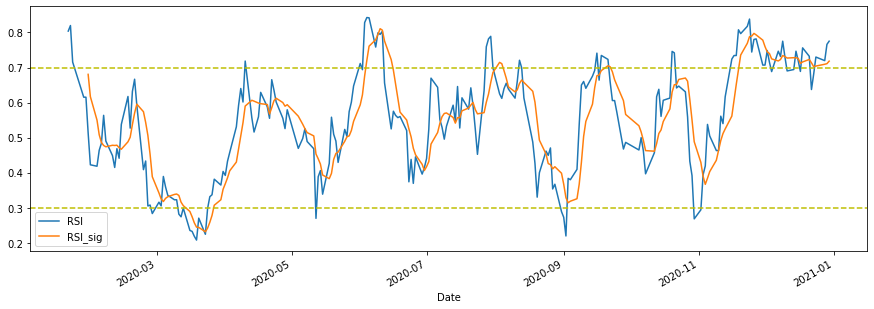

In [107]:
df[['RSI', 'RSI_sig']].plot(figsize=(15, 5))
plt.axhline(0.7, c='y', ls='--')
plt.axhline(0.3, c='y', ls='--')

In [ ]:
# MACD

# 단기아평(12) - 장기이평(26)
# Macd signal : macd 9ma

In [108]:
df = fdr.DataReader('005930', '2020', '2023')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448


In [111]:
df['ema_short'] = df['Close'].ewm(12).mean()
df['ema_long'] = df['Close'].ewm(26).mean()

<AxesSubplot:xlabel='Date'>

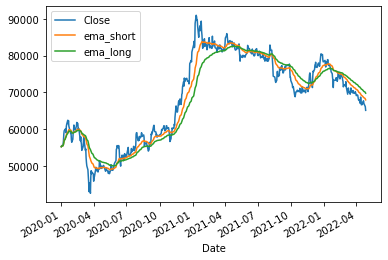

In [112]:
df[['Close', 'ema_short', 'ema_long']].plot()

In [113]:
df['macd'] = df['ema_short'] - df['ema_long']
df['macd_signal'] = df['macd'].ewm(9).mean()
df['macdhist'] = df['macd'] - df['macd_signal']

In [119]:
df_macd = df[['macd', 'macd_signal', 'macdhist']].div(df['Close'], axis=0)

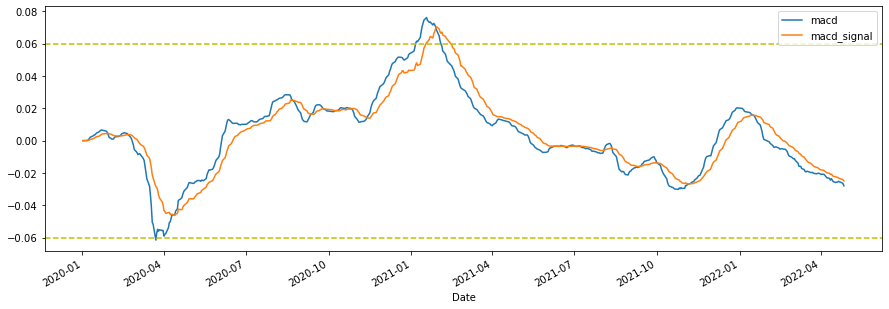

In [124]:
df_macd[['macd', 'macd_signal']].plot(figsize=(15, 5))
plt.axhline(0.06, c='y', ls='--')
plt.axhline(-0.06, c='y', ls='--')

<AxesSubplot:xlabel='Date'>

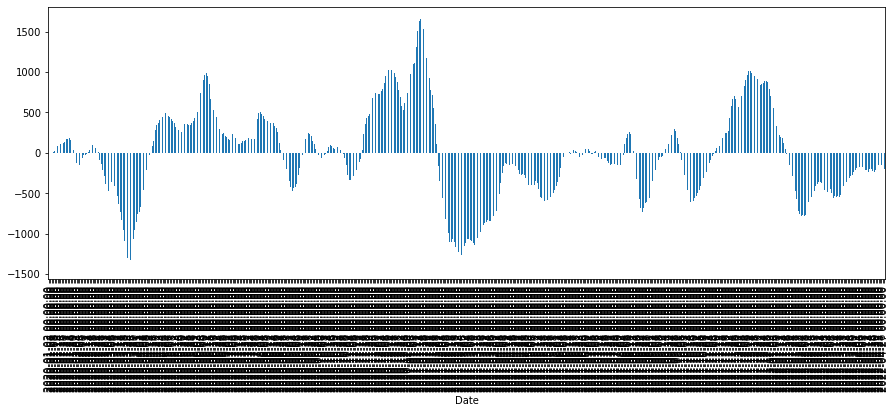

In [123]:
df['macdhist'].plot(kind='bar', figsize=(15, 5))

In [126]:
df.head()

,Open,High,Low,Close,Volume,Change,ema_short,ema_long,macd,macd_signal,macdhist
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.000000,55200.000000,0.000000,0.000000,0.000000
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55356.000000,55352.830189,3.169811,1.668322,1.501490
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55407.889126,55403.749407,4.139719,2.580276,1.559443
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55517.980831,55508.488552,9.492279,4.590164,4.902115
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55816.980100,55786.646004,30.334096,10.876685,19.457411


In [133]:
df['ma20'] = df['Close'].rolling(20).mean()
df['stddev'] = df['Close'].rolling(20).std()
df['lower_b'] = df['ma20'] - (df['stddev'] * 2)

In [138]:
df['stock_pos'] = 0
df['buy_sig'] = (df['stock_pos'].shift(1) == 0) & (df['Close'] <= df['lower_b'])
df['sell_sig'] = (df['Close'].shift(1) > df['ma20'].shift(1)) & (df['Close'] < df['ma20'])

In [139]:
df['buy_sig'] = df['buy_sig'].apply(int)
df['sell_sig'] = df['sell_sig'].apply(int)

In [141]:
con_df = df[(df.buy_sig == 1) | (df.sell_sig == 1)]

In [146]:
con_df = con_df.loc['2020-02-28':]

KeyError: '2020-02-28'

In [148]:
df[(df['buy_sig'] == 1) & (df['buy_sig'].shift(1) == 0)].iloc[1:].head()

,Open,High,Low,Close,Volume,Change,ema_short,ema_long,macd,macd_signal,macdhist,default_pos,stock_pos,ma20,stddev,lower_b,buy_sig,sell_sig
Date,,,,,,,,,,,,,,,,,,
2020-03-12,51000,51900,49300,50800,48149999,-0.024952,56461.402616,57459.146608,-997.743991,-362.368058,-635.375933,0,0,56880.0,2980.038855,50919.922289,1,0
2020-08-31,56000,56100,54000,54000,32671367,-0.025271,56252.806391,55328.334313,924.472079,1278.179221,-353.707143,0,0,56980.0,1313.332443,54353.335114,1,0
2020-10-30,58000,58000,56600,56600,26907844,-0.025818,59205.987331,58351.490754,854.496577,1125.030803,-270.534226,0,0,59660.0,1118.928058,57422.143883,1,0
2021-05-12,80800,81200,79800,80000,35812268,-0.014778,82435.126761,82326.214278,108.912483,550.982273,-442.069790,0,0,82580.0,1070.956287,80438.087426,1,0
2021-08-13,75800,76000,74100,74400,61270643,-0.033766,79505.653304,80043.648251,-537.994947,-374.173445,-163.821501,0,0,79415.0,1891.608895,75631.782211,1,0
